In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

2024-08-27 12:26:34.515035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_size = (32, 32)
batch_size = 32
num_classes = 46

train_data_dir = './n_dataset/Train'
test_data_dir = './n_dataset/Test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 62560 images belonging to 46 classes.
Found 15640 images belonging to 46 classes.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20
)


Epoch 1/20
1955/1955 [==============================] - 114s 57ms/step - loss: 0.9859 - accuracy: 0.7184 - val_loss: 0.4714 - val_accuracy: 0.8538
Epoch 2/20
1955/1955 [==============================] - 96s 49ms/step - loss: 0.2954 - accuracy: 0.9108 - val_loss: 0.3910 - val_accuracy: 0.8864
Epoch 3/20
1955/1955 [==============================] - 83s 42ms/step - loss: 0.1944 - accuracy: 0.9416 - val_loss: 0.4126 - val_accuracy: 0.8865
Epoch 4/20
1955/1955 [==============================] - 62s 32ms/step - loss: 0.1516 - accuracy: 0.9541 - val_loss: 0.3170 - val_accuracy: 0.9118
Epoch 5/20
1955/1955 [==============================] - 79s 40ms/step - loss: 0.1205 - accuracy: 0.9623 - val_loss: 0.3249 - val_accuracy: 0.9079
Epoch 6/20
1955/1955 [==============================] - 59s 30ms/step - loss: 0.1036 - accuracy: 0.9677 - val_loss: 0.3642 - val_accuracy: 0.9023
Epoch 7/20
1955/1955 [==============================] - 58s 30ms/step - loss: 0.0874 - accuracy: 0.9719 - val_loss: 0.4064 

In [7]:
model.save('devanagari_HWRC.h5')

/Users/samarthgayakhe/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of images as in the folders
)


Found 13800 images belonging to 46 classes.


In [15]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

432/432 [==============================] - 7s 16ms/step - loss: 0.1618 - accuracy: 0.9680
Test accuracy: 96.80%


In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

In [17]:
class_labels = [str(i) for i in range(46)]

In [18]:
true_classes = test_generator.classes
num_classes = len(class_labels)

# Binarize the labels for each class
y_test = label_binarize(true_classes, classes=range(num_classes))
y_score = model.predict(test_generator)

432/432 [==============================] - 12s 28ms/step


In [19]:
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # Area Under Curve (AUC)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


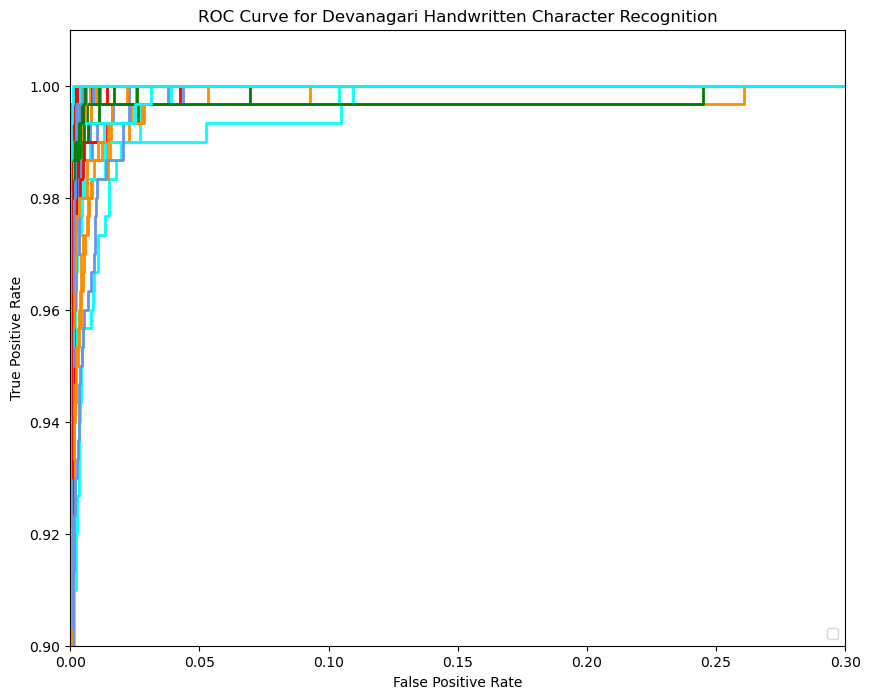

In [43]:
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 0.3])
plt.ylim([0.9, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Devanagari Handwritten Character Recognition')
plt.legend(loc="lower right")
plt.show()

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [78]:
devanagari_labels = {
    0: '०', 1: '१', 2: '२', 3: '३', 4: '४', 5: '५', 6: '६', 7: '७', 8: '८', 9: '९', 
    10: 'क', 11: 'ख', 12: 'ग', 13: 'घ', 14: 'ङ', 15: 'च', 16: 'छ', 17: 'ज', 18: 'झ', 19: 'ञ',
    20: 'ट', 21: 'ठ', 22: 'ड', 23: 'ढ', 24: 'ण', 25: 'त', 26: 'थ', 27: 'द', 28: 'ध', 29: 'न',
    30: 'प', 31: 'फ', 32: 'ब', 33: 'भ', 34: 'म', 35: 'य', 36: 'र', 37: 'ल', 38: 'व', 39: 'श',
    40: 'ष', 41: 'स', 42: 'ह', 43: 'क्ष', 44: 'त्र', 45: 'ज्ञ'
}


In [86]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

def resize_and_crop(img_path, target_size):
    img = Image.open(img_path)
    
    # Resizes image while keeping the aspect ratio
    img.thumbnail((max(target_size), max(target_size)))
    
    # Creates a new image with the target size and paste the resized image onto it
    new_img = Image.new('RGB', target_size, (255, 255, 255))
    new_img.paste(img, ((target_size[0] - img.width) // 2, (target_size[1] - img.height) // 2))
    
    return new_img

target_size = (32, 32)
img = resize_and_crop("test3.png", target_size)
# Convert the image to a numpy array
img_array = np.array(img)

# Expand dimensions to match the expected input shape (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image (rescale pixel values between 0 and 1)
img_array = img_array / 255.0


In [87]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = predicted_class[0]
predicted_character = devanagari_labels[int(class_labels[predicted_class[0]])]

print(f"Predicted Devanagari character: {predicted_character}")


1/1 [==============================] - 0s 30ms/step
Predicted Devanagari character: ह


In [73]:
img.show()